# Lesson 1b: Basic Neural Network with Keras

In this lesson you will build a small neural network in Keras and train it to replicate the logical XOR function.

## Imports

In [1]:
%matplotlib inline
from IPython.display import SVG

from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.regularizers import l2
from keras.utils.vis_utils import model_to_dot
import math
import numpy as np

import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Create dataset for the logical XOR function

In [2]:
data_X = np.array([[0, 0],
                   [1, 0],
                   [0, 1],
                   [1, 1]])
data_y = np.array([0, 
                   1, 
                   1, 
                   0])

## Build the neural net model

In [3]:
model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='sigmoid', kernel_initializer='glorot_normal', 
                kernel_regularizer=l2(0.0001)))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


# Question 1: 
How many parameters are there in the model so far? Why? Explain in detail what each parameter represents. Answer in the cell below. 

There are six parameters in the model so far. There are six because we have two input nodes (one for each column of X), and a single layer with two nodes. The six parameters represent the following:
* One weight parameter between each of the input nodes and each node in the first layer. Since there are two input nodes and two nodes in the first layer, there are a total of four parameters here.
* One bias term for each of the nodes in the first layer. Since there are two nodes, there are a total of two bias terms here.

The above adds up to a total of six parameters.

## Add another layer

In [5]:
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


## Question 2: 
How many new parameters are there now (e.g., how many were added after question 1)? Why? What does each new parameter represent? 

Three additional parameters were added after question one. This is because another layer was added, this time with only a single node. The new parameters represent the following:
* One weight parameter between each of the two nodes in the first layer and the single node in the second layer. There are a total of two parameters here.
* One bias term for the single node in the second layer.

The above adds up to a toal of three new parameters.

There are now a total of 9 parameters:
* One weight between each of the two input nodes and the two nodes in the first layer. This is a total of four parameters.
* One bias term for each of the two nodes in the first layer. This adds two parameters and the running total is now six parameters.
* One weight between each of the two nodes in the first layer and the single node in the second layer. This adds two parameters and the running total is now 8 parameters.
* One bias term for the single node in the second layer. This adds one parameter and the grand total is 9 parameters.

## Visualize the model

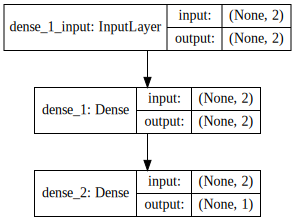

In [7]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Train the model

In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

### Modify the steps per epoch, number of epochs, etc. below as needed. The goal should be 100% accuracy for the XOR data.

In [9]:
model.fit(data_X, data_y,
          steps_per_epoch=1000,
          epochs=10)

Epoch 1/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.2633 - acc: 0.4635
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2498 - acc: 0.5000
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2461 - acc: 0.5000
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1873 - acc: 0.9407
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0912 - acc: 1.0000
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0482 - acc: 1.0000
Epoch 7/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0309 - acc: 1.0000
Epoch 8/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0230 - acc: 1.0000
Epoch 9/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0187 - acc: 1.0000
Epoch 10/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0159 - acc: 1.0000


# Run the trained model on the dataset.

In [10]:
model.predict(data_X)

array([[0.07212649],
       [0.9314379 ],
       [0.92663246],
       [0.07268641]], dtype=float32)

# Question 3:
Explain the results of the predict() call above. How well did the trained model do on this problem?

The result of the predict() call above is the model's estimate for the target vector $y$, which is the expected output of the logical XOR function. The error between this vector and the target vector is quantified by the loss function (mean squared error), which returns the difference between the two. It should continue to decrease as more epochs are used, and as this happens, the predicted values should approach the true values of [0, 1, 1, 0].

The trained model was able to achieve 100% accuracy, meaning it predicted all four values correctly. Note that despite a 100% accuracy, the loss function is still reporting a non-zero value. This is because the accuracy metric is rounding the output, presumably using a threshold of 0.5 to determine whether to round to 0 or 1. The rounded vector is [0, 1, 1, 0] in this case, which matches the expected output. Thus, the model achieved 100% accuracy. 

It is worth noting that depending on the run, the model does not always achieve 100% accuracy, even with 10 epochs and 1000 steps per epoch. This suggests some sensitivity to the initial weights, which are most likely random. Sometimes the model converges to 50% or 75% accuracy, meaning it only correctly predicted 2 or 3 out of the four values. Perhaps even more steps and epochs are needed to guarantee convergence.

# Question 4:
Print the weights of both layers of the trained network below. HINT: model.layers gives a list of layers. layer.get_weights() returns layer weights.

In [11]:
for i, layer in enumerate(model.layers):
    print('Layer %i' % (i+1))
    print('Weights:')
    print(layer.get_weights())

Layer 1
Weights:
[array([[-4.911073,  4.870712],
       [ 4.918023, -4.852263]], dtype=float32), array([-2.8630874, -2.9253035], dtype=float32)]
Layer 2
Weights:
[array([[6.5210857],
       [6.6902056]], dtype=float32), array([-3.2473137], dtype=float32)]


For Layer 1, the 2x2 array represents the four weights between the input nodes and the first layer (one column for each node), and the 1x2 array represents the two bias terms, one for each node in the first layer.

For Layer 2, the 2x1 array represents the weights between the first and second layer, and the 1x1 array represents the single bias term for the second layer.

# Conceptual Overview

The network structure for this portion of the assignment is a multilayer perceptron with a single hidden layer. There are weights between the each layer (input, first, and second), and a bias term for each node in the first and second layers. The purpose of the model is to approximate any function with a continuous mapping from one space to another. In this case, it was used to model the logical XOR function, which is something a single perceptron cannot do. The addition of the hidden layer allows nonlinear behavior to be captured, which adds enormous power to the model. It works by first computing the forward phase, where the output is computed using the current weights and bias, and compared to the expected value. From there, backpropagation is used to update the weights for the next forward phase. This process continues over each row in the input matrix, for the desired number of steps and epochs, where convergence is hopefully achieved.

As noted above, most of the time the model converges to 100% accuracy for the XOR data. However, this is not guaranteed. Perhaps adjusting the number of layers, or nodes within each layer, could increase the convergence rate. Despite this, it is still quite impressive how much power is gained by adding just a single hidden layer, and this should not be understated.